# Students Do: PCA in Action

In this activity, you will use PCA to reduce the dimensions of the consumers shopping dataset from `4` to `2` features. After applying PCA, you will use the principal components data, to fit a K-Means model with `k=6` and make some conclusions.

In [71]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas


## Instructions

1. Import the preprocessed data from the customers shopping dataset into a DataFrame called `df_shopping`.

In [72]:
# Import data
file_path = Path("Data/shopping_data_cleaned.csv")
df_shopping = pd.read_csv(file_path)
df_shopping.head()


,Genre,Age,Annual Income,Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


2. Standardize the data of all the DataFrame features.

In [73]:
# Standardize data
shopping_scaled = StandardScaler().fit_transform(df_shopping)
print(shopping_scaled[0:5])

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]]


3. Apply PCA to reduce dimensions from 4 to 2 and create a DataFrame with the principal components data.

In [74]:
# Initialize PCA model
pca = PCA(n_components=2)
# Get two principal components for the data.
shopping_pca = pca.fit_transform(shopping_scaled)



In [75]:
# Transform PCA data to a DataFrame
df_shopping_pca=pd.DataFrame(data=shopping_pca, columns=['principle component 1', 'principle component 2'])
df_shopping_pca.head()

,principle component 1,principle component 2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


4. Fetch the explained variance, analyze its value and answer the following question: Are two principal components the best number of new dimensions?

In [76]:
# Fetch the explained variance
ev=pca.explained_variance_ratio_.sum()
ev


0.5992069019819846

**Write Your Answer Here**



5. If you conclude that two principal components is the appropriate number of new dimensions, proceed to step 6, on the contrary, explore what happens if you modify the number of principal components. Once you finish, write your conclusions.

In [77]:
# Initialize PCA model
pca2 = PCA(n_components=3)
# Get three principal components for the data.
shopping_pca2 = pca2.fit_transform(shopping_scaled)


In [78]:
# Transform PCA data to a DataFrame
df_shopping_pca2=pd.DataFrame(data=shopping_pca2, columns=['principle component 1', 'principle component 2' 'principle component 3'])
df_shopping_pca2.head()


ValueError: Shape of passed values is (200, 3), indices imply (200, 2)

In [79]:
# Fetch the explained variance
ev2=pca2.explained_variance_ratio_.sum()
ev2


0.8318132878845952

**Write Your Conclusions Here**



6. Fit the K-Means algorithm with `k=6` and the principal components data.

In [80]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_shopping_pca2)

# Predict clusters
predictions = model.predict(df_shopping_pca2)

# Add the predicted class columns
df_shopping_pca2["class"] = model.labels_
df_shopping_pca2.head()

,principle component 1,principle component 2,class
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,1
2,0.050761,-1.894068,2
3,-1.694513,-1.631908,1
4,-0.313108,-1.810483,2


7. Plot the resulting clusters, use the appropriate scatter plot depending on the number of dimensions you have.

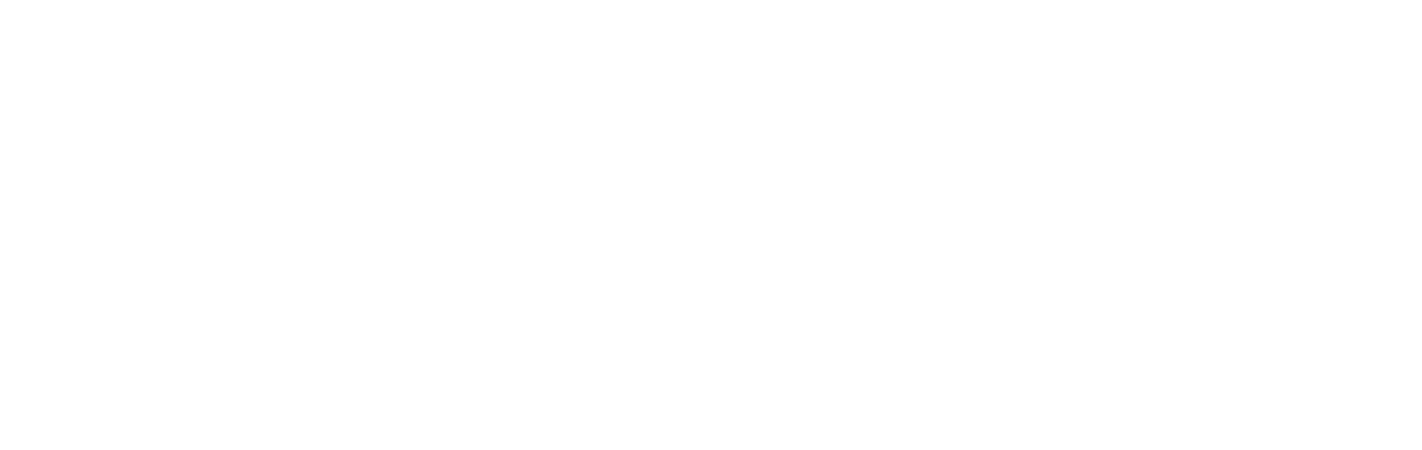

In [81]:
fig = px.scatter_3d(
    df_shopping_pca2,
    x="principle component 1",
    y="principle component 2",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [82]:
dfCentroids=pd.DataFrame(model.cluster_centers_, columns=['PC1', 'PC2', 'PC3'])